In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.DataFrame.from_dict({
    'a': [1,2,3],
    'b': [4,5,6]
})
df

,a,b
0,1,4
1,2,5
2,3,6


In [3]:
ln = len(df)
df['gid1'] = list(range(ln))
df['gid2'] = list(range(ln, 2 * ln))

In [4]:
df

,a,b,gid1,gid2
0,1,4,0,3
1,2,5,1,4
2,3,6,2,5


In [5]:
d = {i: v for i,v in zip(df['a'], df['gid1'])}
d2 = {i: v for i,v in zip(df['b'], df['gid2'])}

In [6]:
d | d2

{1: 0, 2: 1, 3: 2, 4: 3, 5: 4, 6: 5}

In [7]:
# Исходные данные
df = pd.DataFrame({
    'col1': [1, 2, 3],
    'col2': [4, 5, 6], 
    'col3': [7, 8, 9],
    'col4': [10, 11, 12]
})

print("Исходный DataFrame:")
print(df)
print(f"Форма: {df.shape}\n")

# Самый простой и понятный способ:
part1 = df[['col1', 'col2']]  # первые два столбца
part2 = df[['col3', 'col4']]  # последние два столбца
part2.columns = part1.columns  # переименовываем чтобы совпадали имена

result = pd.concat([part1, part2], ignore_index=True)
print("Результат:")
print(result)
print(f"Форма: {result.shape}")

Исходный DataFrame:
   col1  col2  col3  col4
0     1     4     7    10
1     2     5     8    11
2     3     6     9    12
Форма: (3, 4)

Результат:
   col1  col2
0     1     4
1     2     5
2     3     6
3     7    10
4     8    11
5     9    12
Форма: (6, 2)


In [8]:
df = pd.DataFrame({
    'data_type': ['text', 'text', 'text', 'text', 'text'],
    'text_content': [
        'Hello, this is test text',
        'Today the weather is sunny',
        'Programming in Python is fun', 
        'Artificial intelligence is changing the world',
        'Data is the new oil'
    ],
    'media_type': ['image', 'image', 'image', 'image', 'image'],
    'image_path': [
        '/images/photo1.jpg',
        '/data/images/sunset.png',
        'C:\\Users\\User\\Pictures\\chart.gif',
        '/assets/img/ai_brain.svg',
        '/tmp/image_data.bmp'
    ]
})

In [11]:
for i, v in {1:3, 2:7, 3:9}.items():
    print(i, v)

1 3
2 7
3 9


In [1]:
from data import *
from encoding import *
from params import *

In [2]:
import pandas as pd
import numpy as np
import os

In [3]:
df = pd.read_csv('data/flickr30k_images/results.csv', sep='|')

In [4]:
df.head()

,image_name,comment_number,comment
0,1000092795.jpg,0,Two young guys with shaggy hair look at their...
1,1000092795.jpg,1,"Two young , White males are outside near many..."
2,1000092795.jpg,2,Two men in green shirts are standing in a yard .
3,1000092795.jpg,3,A man in a blue shirt standing in a garden .
4,1000092795.jpg,4,Two friends enjoy time spent together .


In [5]:
df = df.dropna(axis=0)

In [6]:
df['id'] = list(range(len(df)))

In [7]:
df[' comment_number'] = df[' comment_number'].astype(int)

In [8]:
def change_path(x):
    return 'data/flickr30k_images/flickr30k_images/' + x

In [9]:
df['npth'] = df['image_name'].map(change_path)

In [10]:
ndf = df[['npth', ' comment']]

In [11]:
ndf[TYPE1_COLUMN_NAME] = TYPE_IMAGE
ndf[TYPE2_COLUMN_NAME] = TYPE_TEXT

C:\Users\ddimo\AppData\Local\Temp\ipykernel_10796\114511065.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ndf[TYPE1_COLUMN_NAME] = TYPE_IMAGE
C:\Users\ddimo\AppData\Local\Temp\ipykernel_10796\114511065.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ndf[TYPE2_COLUMN_NAME] = TYPE_TEXT


In [12]:
ndf.rename(columns={'npth': OBJECT1_COLUMN_NAME, ' comment': OBJECT2_COLUMN_NAME}, inplace=True)

C:\Users\ddimo\AppData\Local\Temp\ipykernel_10796\2617962089.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ndf.rename(columns={'npth': OBJECT1_COLUMN_NAME, ' comment': OBJECT2_COLUMN_NAME}, inplace=True)


In [13]:
ndf.head()

,object1,object2,type1,type2
0,data/flickr30k_images/flickr30k_images/1000092...,Two young guys with shaggy hair look at their...,img,text
1,data/flickr30k_images/flickr30k_images/1000092...,"Two young , White males are outside near many...",img,text
2,data/flickr30k_images/flickr30k_images/1000092...,Two men in green shirts are standing in a yard .,img,text
3,data/flickr30k_images/flickr30k_images/1000092...,A man in a blue shirt standing in a garden .,img,text
4,data/flickr30k_images/flickr30k_images/1000092...,Two friends enjoy time spent together .,img,text


In [14]:
ids = InitialDataset(ndf)

In [15]:
imgs = list(ids.return_images().values())
txts = list(ids.return_texts().values())

In [16]:
ien = ImageEncoder()

In [ ]:
rs_im = ien.encode_from_paths(imgs)

  0%|          | 603/158914 [00:22<1:37:54, 26.95it/s]


KeyboardInterrupt: 

In [18]:
ten = TextEncoder()

modules.json:   0%|          | 0.00/385 [00:00<?, ?B/s]

c:\Users\ddimo\miniconda3\envs\ml\Lib\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\ddimo\.cache\huggingface\hub\models--thenlper--gte-base. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/57.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/618 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/219M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/314 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
ten.encode_list(txts)

Batches:   0%|          | 0/311 [00:00<?, ?it/s]

c:\Users\ddimo\miniconda3\envs\ml\Lib\site-packages\torch\nn\modules\module.py:1784: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


In [1]:
import pandas as pd
from params import *
from data import *
import pickle

def change_path(x):
    return 'data/flickr30k_images/flickr30k_images/' + x

df = pd.read_csv('data/flickr30k_images/results.csv', sep='|')
df = df.dropna(axis=0)
df['npth'] = df['image_name'].map(change_path)
ndf = df[['npth', ' comment']]
ndf[TYPE1_COLUMN_NAME] = TYPE_IMAGE
ndf[TYPE2_COLUMN_NAME] = TYPE_TEXT
ndf.rename(columns={'npth': OBJECT1_COLUMN_NAME, ' comment': OBJECT2_COLUMN_NAME}, inplace=True)

# print(ndf.head())

with open("data/id_image.pkl", "rb") as f:
    id_image = pickle.load(f)

with open("data/id_text.pkl", "rb") as f:
    id_text = pickle.load(f)

dt = InitialDataset(ndf)

ModuleNotFoundError: No module named 'params'

In [25]:
#Костыль пока эмбы не пересчитаю
conv = dt.return_images()
p = 'data/flickr30k_images/flickr30k_images/'

In [26]:
new_id_image = {}
for i,v in id_image.items():
    new_id_image[p + i] = v

In [27]:
conv

{0: 'data/flickr30k_images/flickr30k_images/1000092795.jpg',
 1: 'data/flickr30k_images/flickr30k_images/1000092795.jpg',
 2: 'data/flickr30k_images/flickr30k_images/1000092795.jpg',
 3: 'data/flickr30k_images/flickr30k_images/1000092795.jpg',
 4: 'data/flickr30k_images/flickr30k_images/1000092795.jpg',
 5: 'data/flickr30k_images/flickr30k_images/10002456.jpg',
 6: 'data/flickr30k_images/flickr30k_images/10002456.jpg',
 7: 'data/flickr30k_images/flickr30k_images/10002456.jpg',
 8: 'data/flickr30k_images/flickr30k_images/10002456.jpg',
 9: 'data/flickr30k_images/flickr30k_images/10002456.jpg',
 10: 'data/flickr30k_images/flickr30k_images/1000268201.jpg',
 11: 'data/flickr30k_images/flickr30k_images/1000268201.jpg',
 12: 'data/flickr30k_images/flickr30k_images/1000268201.jpg',
 13: 'data/flickr30k_images/flickr30k_images/1000268201.jpg',
 14: 'data/flickr30k_images/flickr30k_images/1000268201.jpg',
 15: 'data/flickr30k_images/flickr30k_images/1000344755.jpg',
 16: 'data/flickr30k_images/

In [5]:
nnii = {}

for i, v in new_id_image.items():
    nnii[conv[i]] = v

In [1]:
import pandas as pd
from params import *
from data import *
import pickle

def change_path(x):
    return 'data/flickr30k_images/flickr30k_images/' + x

df = pd.read_csv('data/flickr30k_images/results.csv', sep='|')
df = df.dropna(axis=0)
df['npth'] = df['image_name'].map(change_path)
ndf = df[['npth', ' comment']]
ndf[TYPE1_COLUMN_NAME] = TYPE_IMAGE
ndf[TYPE2_COLUMN_NAME] = TYPE_TEXT
ndf.rename(columns={'npth': OBJECT1_COLUMN_NAME, ' comment': OBJECT2_COLUMN_NAME}, inplace=True)

# print(ndf.head())

with open("data/id_image.pkl", "rb") as f:
    id_image = pickle.load(f)

with open("data/id_text.pkl", "rb") as f:
    id_text = pickle.load(f)

C:\Users\ddimo\AppData\Local\Temp\ipykernel_18532\152587308.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ndf[TYPE1_COLUMN_NAME] = TYPE_IMAGE


In [1]:
import torch

In [4]:
class Cell():
    def __init__(self):
        self.type = None
        self.global_id = None
        self.content = None

    def show(self):
        pass


class TextCell(Cell):
    def __init__(self, gid, content):
        self.type = 'text'
        self.global_id = gid
        self.content = content
    
    def show(self, full_inf=False):
        if full_inf:
            pass
        else:
            print(self.content)

In [5]:
tc = TextCell(123, 'Hello')

In [6]:
def f(x: Cell):
    print(x.content)

In [7]:
f(tc)

Hello


In [1]:
import pandas as pd
from params import *
from data import *
import pickle
from models import *
from torch import nn
from torch.optim import Adam
from train import Trainer
from eval import *
from metrics import *

def change_path(x):
    return 'data/flickr30k_images/flickr30k_images/' + x


df = pd.read_csv('data/flickr30k_images/results.csv', sep='|')
df = df.dropna(axis=0)
df['npth'] = df['image_name'].map(change_path)
ndf = df[['npth', ' comment']]
ndf[TYPE1_COLUMN_NAME] = TYPE_IMAGE
ndf[TYPE2_COLUMN_NAME] = TYPE_TEXT
ndf.rename(columns={'npth': OBJECT1_COLUMN_NAME, ' comment': OBJECT2_COLUMN_NAME}, inplace=True)

print('New df formed')

with open("data/id_image.pkl", "rb") as f:
    id_image = pickle.load(f)

with open("data/id_text.pkl", "rb") as f:
    id_text = pickle.load(f)

initial = InitialDataset(ndf)

print('Initial Dataset created')

ds = ID_Dataset(initial.return_id_df(), id_image | id_text)
dataloader = DataLoader(ds, batch_size=TRAIN_BATCH_SIZE, shuffle=True, num_workers=0, pin_memory=False)
model = ConverterModel(512, 768).to(DEVICE)
optim = Adam(model.parameters(), lr=0.01)
criterion = nn.MSELoss()

print('Starting trainining...')

trainer = Trainer(
    model=model,
    dataset=ds,
    dl=dataloader,
    epochs=5,
    batch_size=TRAIN_BATCH_SIZE,
    optimizer=optim,
    criterion=criterion
)

model = trainer.train()
e1 = ds.get_embs_from_ids(initial.return_id_df().iloc[:, 0].values)

res1 = encode_tensors(model, e1)

t = {i: v for i, v in zip(initial.return_id_df().iloc[:, 0].values, res1)}

ready = Ready_Embeddings_Dataset(
    texts=id_text,
    images=t
)

C:\Users\ddimo\AppData\Local\Temp\ipykernel_12976\2002739085.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ndf[TYPE1_COLUMN_NAME] = TYPE_IMAGE


New df formed
Initial Dataset created
Starting trainining...


  0%|          | 0/311 [00:00<?, ?it/s]

Epoch 1. Loss = 0.00024675816746366763


  0%|          | 0/311 [00:00<?, ?it/s]

Epoch 2. Loss = 0.0002304489933635523


  0%|          | 0/311 [00:00<?, ?it/s]

Epoch 3. Loss = 0.00022554479897962665


  0%|          | 0/311 [00:00<?, ?it/s]

Epoch 4. Loss = 0.00021849676119245487


  0%|          | 0/311 [00:00<?, ?it/s]

--- Metric ---
Mean = 0.8658671975135803
STD = 0.01696588657796383
median = 0.8672939538955688



  0%|          | 0/311 [00:00<?, ?it/s]

In [13]:
n = 100
e1[n] == id_image[n]

tensor([True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, Tr

---- SAMPLE 1 ----
 A man in an orange hat and carrying papers lifts his pinkie finger , while holding a sign .

--- SEARCH BY text ---


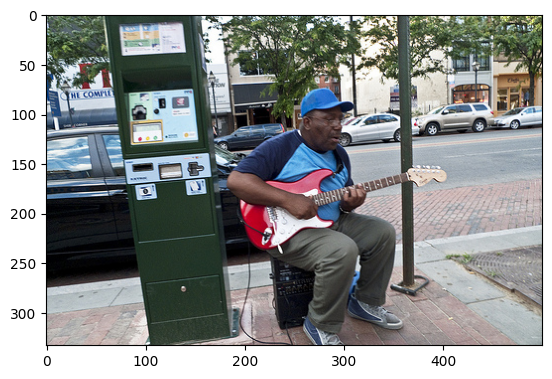




---- SAMPLE 2 ----
 Patriotic team fans have fun while watching the game .

--- SEARCH BY text ---


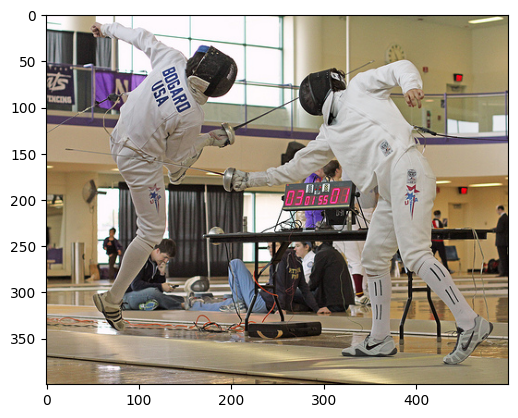




---- SAMPLE 3 ----
 Two young men one in a yellow sweatshirt and the other has no top on they are tossing a piece of green material .

--- SEARCH BY text ---


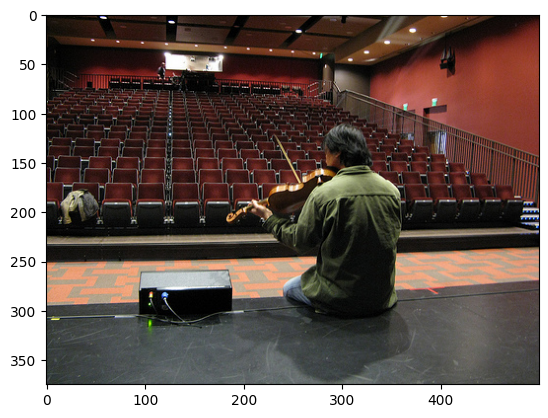




---- SAMPLE 4 ----
 A young girl is sitting in a chair and reading a book .

--- SEARCH BY text ---


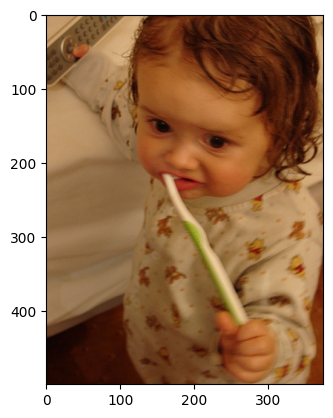




---- SAMPLE 5 ----
 Two monks in saffron colored robes cross a busy urban street , where colorful cars , some pink , blue and yellow , wait at the crosswalk for the men to cross .

--- SEARCH BY text ---


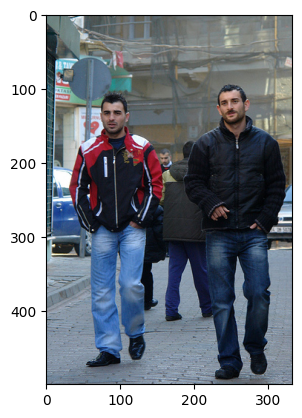

In [2]:
visual_validation(initial=initial, id_ds=ds, rds=ready, n_neib=2, n_samples=5)